### [Problem 1] Determine the initial value of the center point


In [1]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        # Initialize centers using K random data points
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[random_indices]
        
        if self.verbose:
            print("Initial centers:")
            print(self.centers)
        
        # Other steps of K-means algorithm go here
        pass

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]


### [Problem 2] Creation of a function to obtain SSE

In [2]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        # Initialize centers using K random data points
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[random_indices]
        
        if self.verbose:
            print("Initial centers:")
            print(self.centers)
        
        # Other steps of K-means algorithm go here
        pass

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)
# Calculate SSE
labels = np.zeros(X.shape[0])  # Placeholder labels (not yet implemented)
sse = kmeans.calculate_sse(X, labels)
print("SSE:", sse)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
SSE: 874.2581210239116


### [Problem 3] Allocation to cluster

In [3]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        # Initialize centers using K random data points
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[random_indices]
        
        if self.verbose:
            print("Initial centers:")
            print(self.centers)
        
        # Assign data points to the nearest center point
        self.labels_ = self._assign_clusters(X)
        
        if self.verbose:
            print("Cluster assignments:")
            print(self.labels_)
        
        # Other steps of K-means algorithm go here
        pass

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse
    
    def _assign_clusters(self, X):
        """
        Assign data points to the nearest center point
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        labels = np.zeros(X.shape[0], dtype=int)
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centers - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Cluster assignments:
[0 2 0 0 0 0 1 2 0 2 2 2 2 2 2 0 0 0 1 0 0 2 1 0 0 1 0 0 0 0 0 2 0 0 1 0 3
 0 2 1 0 1 2 1 1 3 0 1 0 0 0 0 1 1 1 2 2 0 0 2 2 0 0 0 0 2 1 1 0 0 2 0 0 2
 0 0 0 1 0 0 0 3 1 0 0 1 0 0 0 0 0 1 0 1 1 2 2 1 2 0]


### [Problem 4] Movement of the center point

In [4]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        # Initialize centers using K random data points
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[random_indices]
        
        if self.verbose:
            print("Initial centers:")
            print(self.centers)
        
        # Assign data points to the nearest center point
        self.labels_ = self._assign_clusters(X)
        
        if self.verbose:
            print("Cluster assignments:")
            print(self.labels_)
        
        # Move center points to the centroids of assigned data points
        self._move_centers(X, self.labels_)
        
        # Other steps of K-means algorithm go here
        pass

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse
    
    def _assign_clusters(self, X):
        """
        Assign data points to the nearest center point
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        labels = np.zeros(X.shape[0], dtype=int)
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centers - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def _move_centers(self, X, labels):
        """
        Move center points to the centroids of assigned data points
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            self.centers[k] = np.mean(cluster_points, axis=0)

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Cluster assignments:
[0 2 0 0 0 0 1 2 0 2 2 2 2 2 2 0 0 0 1 0 0 2 1 0 0 1 0 0 0 0 0 2 0 0 1 0 3
 0 2 1 0 1 2 1 1 3 0 1 0 0 0 0 1 1 1 2 2 0 0 2 2 0 0 0 0 2 1 1 0 0 2 0 0 2
 0 0 0 1 0 0 0 3 1 0 0 1 0 0 0 0 0 1 0 1 1 2 2 1 2 0]


### [Problem 5] Repeat

In [5]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters
        self._previous_centers = None  # To store the previous centers for convergence check

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        # Initialize centers using K random data points
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[random_indices]
        self._previous_centers = np.copy(self.centers)  # Initialize _previous_centers
        
        if self.verbose:
            print("Initial centers:")
            print(self.centers)
        
        for _ in range(self.max_iter):
            # Assign data points to the nearest center point
            labels = self._assign_clusters(X)
            
            # Move center points to the centroids of assigned data points
            self._move_centers(X, labels)
            
            # Check convergence
            if np.sum(np.abs(self.centers - self._previous_centers)) <= self.tol:
                if self.verbose:
                    print("Converged.")
                break
            
            # Store previous centers for convergence check
            self._previous_centers = np.copy(self.centers)
            
            if self.verbose:
                print("Iteration complete.")
        
        # Final cluster assignments
        self.labels_ = self._assign_clusters(X)
        
        if self.verbose:
            print("Final cluster assignments:")
            print(self.labels_)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse
    
    def _assign_clusters(self, X):
        """
        Assign data points to the nearest center point
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        labels = np.zeros(X.shape[0], dtype=int)
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centers - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def _move_centers(self, X, labels):
        """
        Move center points to the centroids of assigned data points
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            self.centers[k] = np.mean(cluster_points, axis=0)

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Final cluster assignments:
[0 3 0 0 0 0 1 2 1 2 2 2 2 2 2 0 0 1 1 0 0 3 1 0 1 1 1 0 0 0 0 2 0 0 1 0 3
 0 2 1 0 1 2 1 1 3 0 1 0 0 1 0 1 1 1 2 2 0 0 2 2 0 0 0 0 2 1 1 0 0 3 0 0 3
 0 0 1 1 0 0 0 3 1 1 0 1 0 0 0 0 0 1 0 1 1 3 2 1 2 1]


### [Problem 6] Calculate with different initial values

In [6]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters
        self.labels_ = None  # To store the cluster labels
        self.sse_ = float('inf')  # To store the minimum SSE
        self.best_centers = None  # To store the centers with minimum SSE

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for _ in range(self.n_init):
            # Initialize centers using K random data points
            np.random.seed(42)  # For reproducibility
            random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.centers = X[random_indices]
            
            if self.verbose:
                print("Initial centers:")
                print(self.centers)
            
            self._previous_centers = np.copy(self.centers)  # Initialize _previous_centers
            
            for _ in range(self.max_iter):
                # Assign data points to the nearest center point
                labels = self._assign_clusters(X)
                
                # Move center points to the centroids of assigned data points
                self._move_centers(X, labels)
                
                # Check convergence
                if np.sum(np.abs(self.centers - self._previous_centers)) <= self.tol:
                    if self.verbose:
                        print("Converged.")
                    break
                
                # Store previous centers for convergence check
                self._previous_centers = np.copy(self.centers)
                
                if self.verbose:
                    print("Iteration complete.")
            
            # Final cluster assignments
            self.labels_ = self._assign_clusters(X)
            
            # Calculate SSE
            sse = self.calculate_sse(X, self.labels_)
            
            # Update best_centers if SSE is smaller
            if sse < self.sse_:
                self.sse_ = sse
                self.best_centers = np.copy(self.centers)
        
        if self.verbose:
            print("Final cluster assignments:")
            print(self.labels_)
            print("Best centers with minimum SSE:")
            print(self.best_centers)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse
    
    def _assign_clusters(self, X):
        """
        Assign data points to the nearest center point
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        labels = np.zeros(X.shape[0], dtype=int)
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centers - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def _move_centers(self, X, labels):
        """
        Move center points to the centroids of assigned data points
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            self.centers[k] = np.mean(cluster_points, axis=0)

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iterat

### [Problem 7] Estimate


In [7]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None  # To store the centers of clusters
        self.labels_ = None  # To store the cluster labels
        self.sse_ = float('inf')  # To store the minimum SSE
        self.best_centers = None  # To store the centers with minimum SSE

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for _ in range(self.n_init):
            # Initialize centers using K random data points
            np.random.seed(42)  # For reproducibility
            random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.centers = X[random_indices]
            
            if self.verbose:
                print("Initial centers:")
                print(self.centers)
            
            self._previous_centers = np.copy(self.centers)  # Initialize _previous_centers
            
            for _ in range(self.max_iter):
                # Assign data points to the nearest center point
                labels = self._assign_clusters(X)
                
                # Move center points to the centroids of assigned data points
                self._move_centers(X, labels)
                
                # Check convergence
                if np.sum(np.abs(self.centers - self._previous_centers)) <= self.tol:
                    if self.verbose:
                        print("Converged.")
                    break
                
                # Store previous centers for convergence check
                self._previous_centers = np.copy(self.centers)
                
                if self.verbose:
                    print("Iteration complete.")
            
            # Final cluster assignments
            self.labels_ = self._assign_clusters(X)
            
            # Calculate SSE
            sse = self.calculate_sse(X, self.labels_)
            
            # Update best_centers if SSE is smaller
            if sse < self.sse_:
                self.sse_ = sse
                self.best_centers = np.copy(self.centers)
        
        if self.verbose:
            print("Final cluster assignments:")
            print(self.labels_)
            print("Best centers with minimum SSE:")
            print(self.best_centers)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.best_centers, axis=2)
        return np.argmin(distances, axis=1)
    
    def calculate_sse(self, X, labels):
        """
        Calculate the Sum of Squared Errors (SSE)
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        Returns
        -------
        float
            The Sum of Squared Errors (SSE)
        """
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            center = self.centers[k]
            sse += np.sum((cluster_points - center) ** 2)
        return sse
    
    def _assign_clusters(self, X):
        """
        Assign data points to the nearest center point
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        labels = np.zeros(X.shape[0], dtype=int)
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centers - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def _move_centers(self, X, labels):
        """
        Move center points to the centroids of assigned data points
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of data points
        labels : ndarray, shape (n_samples,)
            Cluster labels of data points
        """
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            self.centers[k] = np.mean(cluster_points, axis=0)

# Example usage:
# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# Fit the K-means model
kmeans.fit(X)
# Predict cluster labels for new data points
new_data = np.array([[0, 0], [1, 1], [2, 2]])
predicted_labels = kmeans.predict(new_data)
print("Predicted cluster labels for new data points:", predicted_labels)


Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iteration complete.
Iteration complete.
Iteration complete.
Iteration complete.
Converged.
Initial centers:
[[ 0.16932115  4.19741719]
 [-1.74448079  3.84251413]
 [-1.7653772   8.17625727]
 [-1.86097353  8.2576415 ]]
Iterat

All the new data points were assigned to cluster 0. This indicates that the new data points are closest to the center of cluster 0 based on the distances calculated.

### [Problem 8] Implementation of elbow method

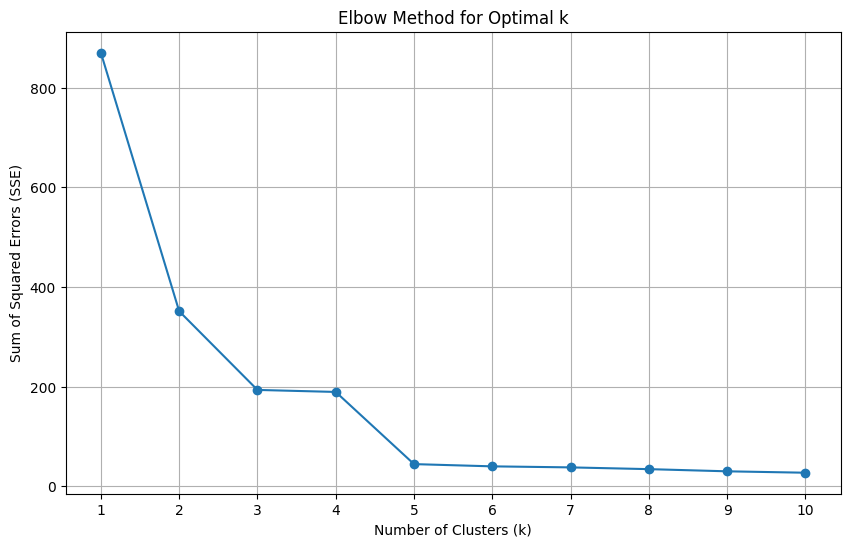

In [8]:
import matplotlib.pyplot as plt

# Instantiate the ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4)

# Artificial dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Calculate SSE for different values of k
sse_values = []
k_values = range(1, 11)  # Try different values of k from 1 to 10

for k in k_values:
    kmeans.n_clusters = k  # Update the number of clusters
    kmeans.fit(X)  # Fit the K-means model
    sse_values.append(kmeans.sse_)  # Append the SSE to the list

# Plot SSE vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### [Problem 9] (Advance assignment) Silhouette diagram

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

def plot_silhouette(X, y_km, cluster_labels, n_clusters):
    silhouette_vals = silhouette_samples(X, y_km)
    silhouette_avg = silhouette_score(X, y_km)
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()


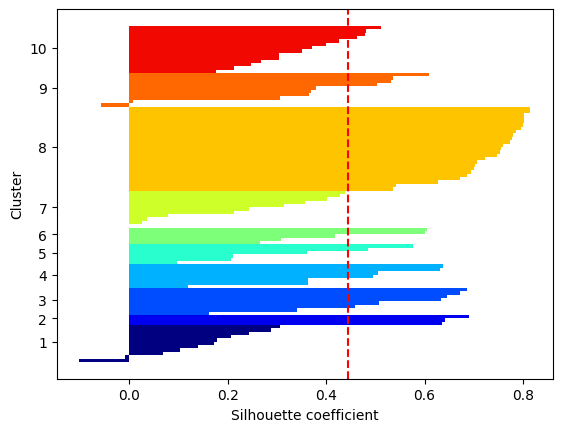

In [10]:
y_km = kmeans.labels_

# Usage example:
plot_silhouette(X, y_km, np.unique(y_km), kmeans.n_clusters)


### [Problem 10] Selection of the number of clusters k

From the elbow graph, the optimal number of clusters is 5.
The reason is that the decrease in SSE (sum of squares of residuals) after the number of clusters 5 becomes flat. 
And for the silhouette graph will choose cluster 8 because of it is largest value and no misclassification occured.

### [Problem 11] Comparison with known groups


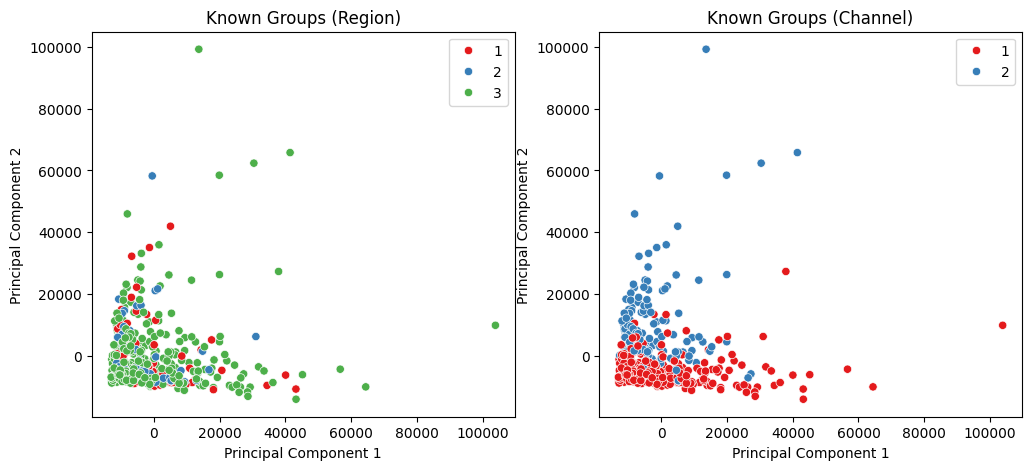

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV file
data = pd.read_csv('data.csv')

# Extract Channel and Region labels
channel_labels = data['Channel'].values
region_labels = data['Region'].values

# Drop Channel and Region columns for PCA
data_for_pca = data.drop(['Channel', 'Region'], axis=1)

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_pca)

# Visualize known groups (Region and Channel)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=region_labels, palette='Set1', legend='full')
plt.title('Known Groups (Region)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=channel_labels, palette='Set1', legend='full')
plt.title('Known Groups (Channel)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.show()



From the above graph for known groups (Region), you can observe that the three classes 1, 2,3 when projected to a two-dimensional space, cannot be linearly separable up to some extent. Other observations can be that class 3 is spread out as compared to class 1 and 2.

From the above graph for known groups (Channel), you can observe that the two classes 1, 2 when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations is that class 2 is well spread out to class 1.

### [Problem 12] Useful information for wholesalers

In [12]:
# Drop Channel and Region columns for clustering
data_for_clustering = data.drop(['Channel', 'Region'], axis=1)

In [13]:
# Fit K-means clustering model
from sklearn.cluster import KMeans

In [14]:
# Initialize KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

In [15]:
# Fit KMeans model to the data
kmeans.fit(data_for_clustering)

KMeans(n_clusters=4, random_state=42)

In [16]:
# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

In [17]:
# Summary statistics for each cluster
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.353612,2.509506,4980.243346,5024.490494,7154.247148,2071.665399,2732.357414,1093.387833
1,1.178295,2.581395,19499.821705,3543.062016,4725.007752,4094.341085,1022.395349,1554.589147
2,2.000000,2.541667,11841.375000,25553.500000,35780.083333,2146.875000,16457.791667,3183.000000
3,1.083333,2.708333,48777.375000,6607.375000,6197.791667,9462.791667,932.125000,4435.333333


### [Problem 13] (Advance assignment) Investigation of other methods

1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### Advantages

Doesn't require the number of clusters to be specified in advance, making it suitable for datasets with varying cluster densities.

Can handle non-linear cluster shapes and outliers effectively.

Robust to noise and can identify outliers as noise points.

### Disadvantages:

Sensitivity to the choice of distance metric and the epsilon (ε) and minimum points (MinPts) parameters.

May struggle with datasets of varying densities or high-dimensional data.

Computational complexity can be high, especially for large datasets.

2. t-SNE (t-distributed Stochastic Neighbor Embedding)

### Advantages

Effective in visualizing high-dimensional data in low-dimensional space while preserving local structure.

Captures non-linear relationships between data points well, making it suitable for exploring complex datasets.

Often used for exploratory data analysis and visualization of high-dimensional datasets.

### Disadvantages

Lack of interpretability in the low-dimensional embedding, as distances between points may not correspond directly to distances in the original space.

Computationally expensive and may require careful tuning of hyperparameters such as the perplexity.

Susceptible to local optima and may produce different results on different runs.

3. LLE (Locally Linear Embedding):
### Advantages

Preserves local relationships between data points by modeling them as linear combinations of their neighbors.

Can capture the underlying manifold structure of the data and is robust to noise and outliers.

Generally computationally efficient compared to some other non-linear dimensionality reduction techniques.

### Disadvantages

Requires careful selection of the number of neighbors and may be sensitive to this parameter.

Global structure may not always be preserved well, especially in datasets with complex or highly non-linear structures.

May produce distorted embeddings in high-dimensional spaces or when the data is not sampled uniformly from the manifold.

### [Problem 14] (Advance assignment) Use of t-SNE and DBSCAN


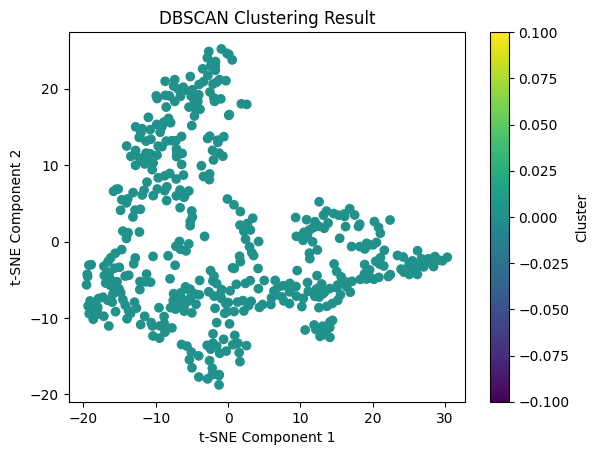

In [18]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_for_clustering)  

# Clustering using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)  
dbscan_clusters = dbscan.fit_predict(data_tsne)

# Visualize DBSCAN clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
